Chamfer Distance 0.00011758149048546329
SSIM 0.8686779233712314
PSNR 15.576120999036757


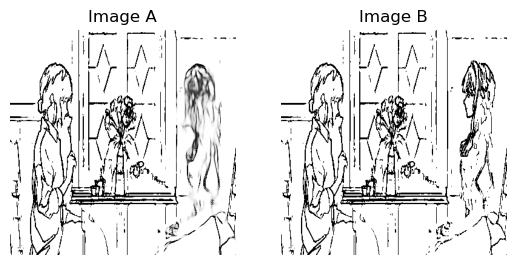

In [36]:
'''
Returns the Chamfer Distance between two images
'''

from _eval.chamfer_dist import batch_chamfer_distance
from skimage.metrics import structural_similarity as get_ssim
from skimage.metrics import peak_signal_noise_ratio as get_psnr
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt


path_a = 'mini_datasets/cd_visualizer/medium_GAN_full_2.gif'
path_b = 'mini_datasets/cd_visualizer/medium_GAN_full_1.gif'


# Read batch of images as torch tensors
img_a = torch.tensor(np.array(Image.open(path_a)), dtype=torch.float32)
img_a = img_a / img_a.max()
img_b = torch.tensor(np.array(Image.open(path_b)), dtype=torch.float32)
img_b = img_b / img_b.max()
# create blank image: image with white pixels only (value of 1) with the same shape of image b
# img_a = torch.ones_like(img_b)- 1.0

ssim = get_ssim(img_a.cpu().numpy(), img_b.cpu().numpy(), multichannel=False, data_range=1.0)
psnr = get_psnr(img_a.cpu().numpy(), img_b.cpu().numpy(), data_range=1.0)


# Unsqueeze to add batch dimension if there aren't any (batch_chamfer_distance() expects a batch of images)
if len(img_a.shape) < 3:
    img_a = img_a.unsqueeze(0)
    img_b = img_b.unsqueeze(0)


# Calculate Chamfer Distance
chamfer_distance = batch_chamfer_distance(img_a, img_b, bit_reverse=True)
print('Chamfer Distance', chamfer_distance.item())
print('SSIM', ssim)
print('PSNR', psnr)


# Visualize the images
plt.figure()
plt.subplot(1, 2, 1)  # arguments are nrows, ncols, index
plt.imshow(img_a.squeeze(0), cmap='gray')
plt.title("Image A")
plt.grid(False)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_b.squeeze(0), cmap='gray')
plt.title("Image B")
plt.grid(False)
plt.axis('off')

plt.show()